In [1]:
import nibabel as nib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import imageio 
from nilearn.image import resample_to_img, resample_img
from nilearn import plotting
from scipy.ndimage import center_of_mass, measurements
import pickle


In [2]:
def read_all_niftis_raw(sub, data_dir):
    mask = nib.load(f"{data_dir}/sub-{sub}/sub-{sub}_space-T2S_CMB.nii.gz")
    t2s = nib.load(f"{data_dir}/sub-{sub}/sub-{sub}_space-T2S_desc-masked_T2S.nii.gz")
    t2 = nib.load(f"{data_dir}/sub-{sub}/sub-{sub}_space-T2S_desc-masked_T2.nii.gz")
    t1 = nib.load(f"{data_dir}/sub-{sub}/sub-{sub}_space-T2S_desc-masked_T1.nii.gz")

    return mask, t2s, t2, t1


def read_data_processed(sub, data_dir):
    
    cmb, mri = nib.load(f"{data_dir}/Annotations/sub-{sub}.nii.gz"), nib.load(f"{data_dir}/MRIs/sub-{sub}.nii.gz")
    with open(f"{data_dir}/Annotations_metadata/sub-{sub}_raw.pkl", "rb") as file:
        metadata_raw = pickle.load(file)
    with open(f"{data_dir}/Annotations_metadata/sub-{sub}_processed.pkl", "rb") as file:
        metadata_processed = pickle.load(file)
        
    return cmb, mri, metadata_raw, metadata_processed
def plot_mask_on_image(img_data, mask_data, cm_coords, alpha=0.5, title=""):

    # Ensure that both the image and the mask have the same shape
    assert img_data.shape == mask_data.shape, "Image and mask have different shapes!"
    
    # Find the center of mass of the mask
    x, y, z = int(cm_coords[0]), int(cm_coords[1]), int(cm_coords[2])
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Plot slices from each dimension at the center of mass
    axes[0].imshow(img_data[x, :, :], cmap='gray')
    axes[0].imshow(mask_data[x, :, :], alpha=0.5, cmap='Reds', interpolation='none')
    axes[0].set_title(f"Sagittal plane at x={x}")

    axes[1].imshow(img_data[:, y, :], cmap='gray')
    axes[1].imshow(mask_data[:, y, :], alpha=0.5, cmap='Reds', interpolation='none')
    axes[1].set_title(f"Coronal plane at y={y}")

    axes[2].imshow(img_data[:, :, z], cmap='gray')
    axes[2].imshow(mask_data[:, :, z], alpha=0.5, cmap='Reds', interpolation='none')
    axes[2].set_title(f"Axial plane at z={z}")

    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

### Load data

In [3]:
sub = 102

# rawdata
data_dir = "/datadrive_m2/jorge/data/VALDO"
mask, t2s, t2, t1 = read_all_niftis_raw(sub, data_dir)

# newdata
data_dir = "/datadrive_m2/jorge/TEST/VALDO/Data"

cmb, mri = nib.load(f"{data_dir}/Annotations/sub-{sub}.nii.gz"), nib.load(f"{data_dir}/MRIs/sub-{sub}.nii.gz")
with open(f"{data_dir}/Annotations_metadata/sub-{sub}_raw.pkl", "rb") as file:
    metadata_raw = pickle.load(file)
with open(f"{data_dir}/Annotations_metadata/sub-{sub}_processed.pkl", "rb") as file:
    metadata_pro = pickle.load(file)

# Visualize rawdata vs. processed

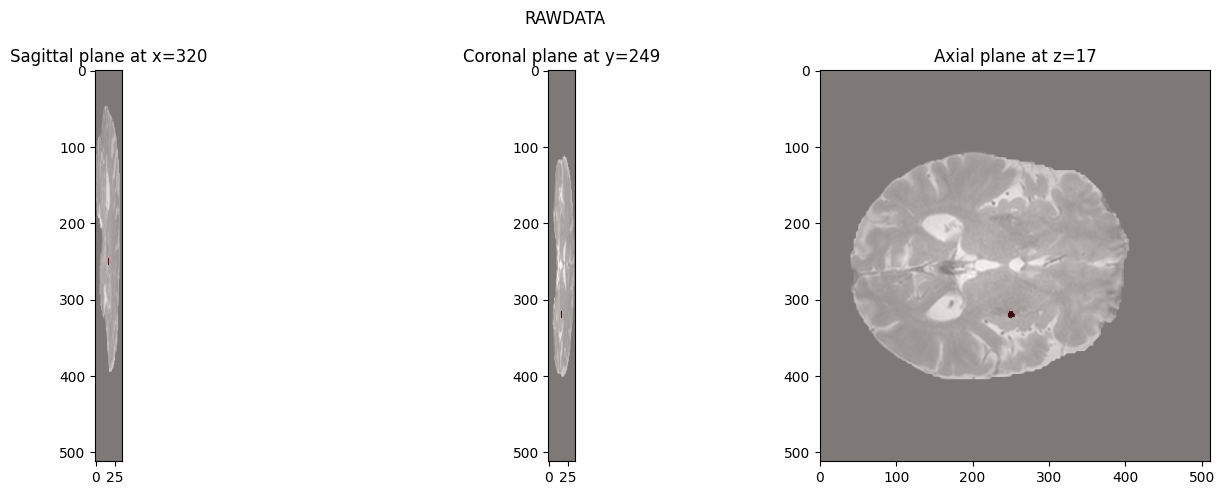

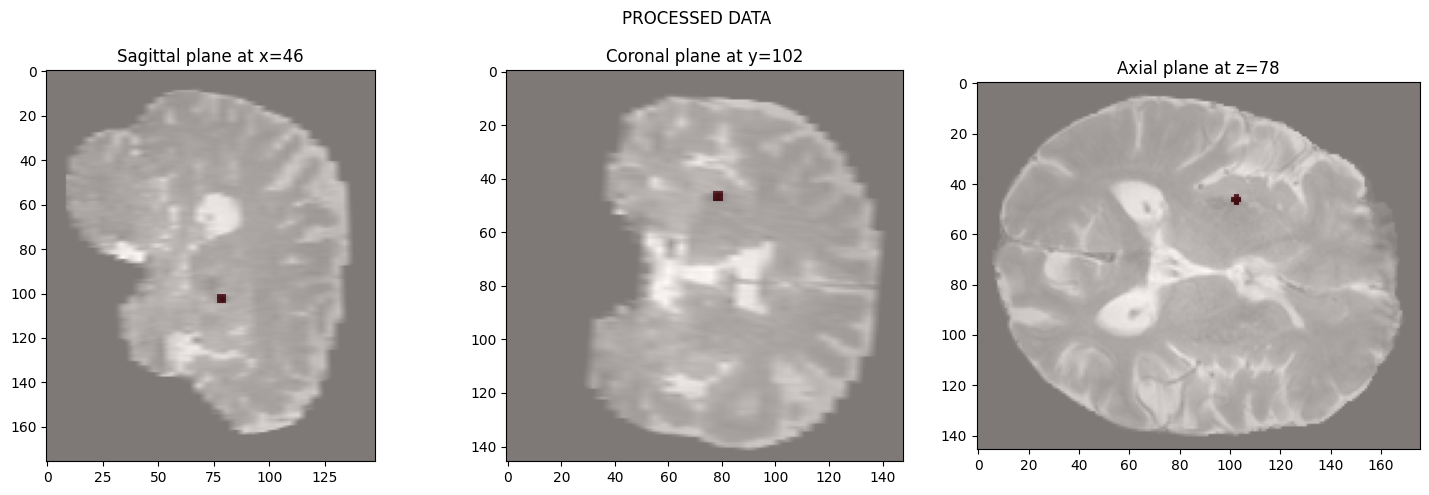

In [4]:
for coords_old, coords_new in zip(metadata_raw['T2S'][0], metadata_pro['T2S'][0]):
    plot_mask_on_image(t2s.get_fdata()[:, :, :], mask.get_fdata()[:, :, :], cm_coords=coords_old, alpha=0.5, title="RAWDATA")
    plot_mask_on_image(mri.get_fdata()[:, :, :, 0], cmb.get_fdata()[:, :, :, 0], cm_coords=coords_new, alpha=0.5, title="PROCESSED DATA")